<a href="https://colab.research.google.com/github/dvtran63/ai-learning-notebooks/blob/main_b1/day4_supervised_learning_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Day 4 – Supervised Learning Basics

This notebook introduces supervised learning using classification and regression.
We'll use scikit-learn to explore both tasks.

## 🔢 Classification with Logistic Regression (Binary: Is Setosa?)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
X, y = load_iris(return_X_y=True)
y = (y == 0).astype(int)  # Binary classification: Setosa or not

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        15

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## 📈 Regression with Linear Regression

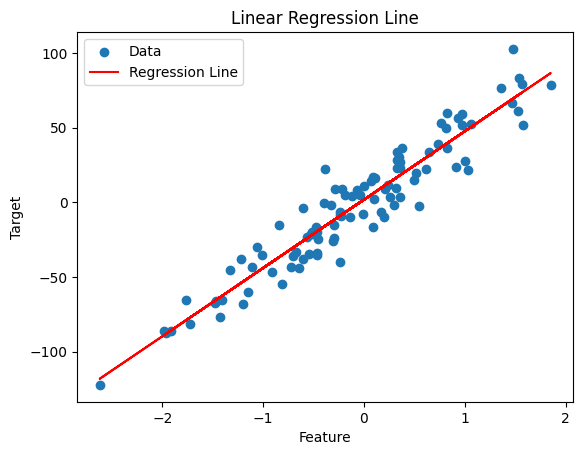

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Train model
reg = LinearRegression()
reg.fit(X, y)

# Plot results
plt.scatter(X, y, label="Data")
plt.plot(X, reg.predict(X), color='red', label="Regression Line")
plt.title("Linear Regression Line")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

## 🧪 Your Exercises
- Try `KNeighborsClassifier` on the Iris dataset.
- Load Titanic dataset using Seaborn and train logistic regression on it.
- Visualize model performance using confusion matrix or scatter plots.

In [1]:
##KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


# Load data
X, y = load_iris(return_X_y=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Normalize features (important!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.81      0.93      0.87        14
           2       0.93      0.81      0.87        16

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



# ***Load Titanic dataset using Seaborn and train logistic regression on it.***

 Grok's solution

In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# 1. Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# 2. Preprocess the data
# Select relevant features
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
X = titanic[features]
y = titanic['survived']

# Handle missing values
X['age'] = X['age'].fillna(X['age'].mean())
X['fare'] = X['fare'].fillna(X['fare'].mean())

# Encode categorical variable 'sex'
label_encoder = LabelEncoder()
X['sex'] = label_encoder.fit_transform(X['sex'])

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 5. Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.81


/tmp/ipython-input-3-3237380250.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = X['age'].fillna(X['age'].mean())
/tmp/ipython-input-3-3237380250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['fare'] = X['fare'].fillna(X['fare'].mean())
/tmp/ipython-input-3-3237380250.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Gemini's solution

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml

# Load the training data
"""try:
    df = pd.read_csv('train.csv')
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please make sure the file is in the same directory.")
    # You might want to provide an alternative way to load, e.g., from a URL if available
    # For instance, if using seaborn's built-in dataset:
    # import seaborn as sns
    # df = sns.load_dataset('titanic')
    exit() # Exit if the file isn't found
"""

# Load the Titanic dataset
try:
    titanic = fetch_openml(name='titanic', version=1, as_frame=True)
    #titanic_df = titanic.frame
    df = titanic.frame
except (ValueError, KeyError) as e:
    print(f"Error loading dataset: {e}")
    df = None
    exit() # Exit if the file isn't found

# Check if the data was loaded successfully
#if titanic_df is not None:
    # Print the first few rows of the DataFrame
print(df.head())

    # Print the shape of the DataFrame
print(f"\nShape of the DataFrame: {df.shape}")

    # Print the column names
print(f"\nColumn names: {df.columns.tolist()}")
#else:
#   print("Titanic dataset could not be loaded.")


print("Dataset loaded successfully. First 5 rows:")
df.head()
print("\nDataset information:")
df.info()

# Drop unnecessary columns
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Separate target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Define numerical and categorical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex', 'Embarked']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Fill missing age with mean
    ('scaler', StandardScaler()) # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing embarked with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical features
])

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Display some stats before processing
print("\nMissing values before preprocessing:")
print(X.isnull().sum())

# Create the full pipeline
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(solver='liblinear', random_state=42))])
# 'liblinear' solver is good for small datasets and supports L1 and L2 regularization.
# random_state for reproducibility

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
print("\nTraining the Logistic Regression model...")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# You can also inspect coefficients if needed (after fitting the pipeline)
# Note: Coefficients will be for the preprocessed features
# If you want to see them in relation to original features, it's more complex with a pipeline
# print("\nModel Coefficients:")
# print(model_pipeline.named_steps['classifier'].coef_)
# print("\nModel Intercept:")
# print(model_pipeline.named_steps['classifier'].intercept_)


   pclass survived                                             name     sex  \
0       1        1                    Allen, Miss. Elisabeth Walton  female   
1       1        1                   Allison, Master. Hudson Trevor    male   
2       1        0                     Allison, Miss. Helen Loraine  female   
3       1        0             Allison, Mr. Hudson Joshua Creighton    male   
4       1        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis,

KeyError: "['PassengerId', 'Name', 'Ticket', 'Cabin'] not found in axis"